# Boosting

## 1. What is Boosting in Machine Learning? Explain how it improves weak learners.
Boosting is a machine learning ensemble technique where multiple weak learners are combined to form a strong learner. A weak learner is a model that performs slightly better than random guessing. Boosting works by training models sequentially, where each model tries to correct the errors of the previous one. This improves the overall performance gradually. Boosting reduces bias and variance and results in better accuracy in both classification and regression tasks.

## 2. What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?
In AdaBoost, each model is trained by adjusting the weights of the training data based on the previous model's errors. Misclassified samples get higher weights so that the next model focuses more on them. In Gradient Boosting, models are trained to minimize the loss function by using gradients. Instead of reweighting, Gradient Boosting fits the next model to the residual errors made by the previous one. Both improve over previous models, but the way they focus on errors is different.

## 3. How does regularization help in XGBoost?
XGBoost uses regularization to prevent overfitting. It adds a penalty term to the objective function to control the complexity of the model. This penalty is based on the number of leaf nodes and the values in each leaf. By using regularization parameters like alpha (L1) and lambda (L2), XGBoost keeps the model simpler and more generalized, especially useful in large and noisy datasets.

## 4. Why is CatBoost considered efficient for handling categorical data?
CatBoost is efficient for categorical data because it handles categorical variables internally without the need for manual encoding like one-hot or label encoding. It uses a method called ordered boosting and target statistics to convert categorical values in a way that avoids data leakage and overfitting. This makes it faster and more accurate in real-world datasets that have many categorical features.

## 5. What are some real-world applications where boosting techniques are preferred over bagging methods?
Boosting techniques are preferred in applications where high accuracy is needed and data is noisy or has imbalanced classes. Some use cases are:
- Fraud detection in banking
- Customer churn prediction in telecom
- Credit scoring in FinTech
- Disease diagnosis in healthcare
- Sales forecasting in e-commerce
Boosting models tend to outperform bagging methods like Random Forest in terms of accuracy, especially on complex datasets.


## 6.Write a Python program to:
- Train an AdaBoost Classifier on the Breast Cancer dataset
- Print the model accuracy

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train AdaBoost
model = AdaBoostClassifier(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))


Model Accuracy: 0.9649122807017544


## 7.Write a Python program to:
- Train a Gradient Boosting Regressor on the California Housing dataset
- Evaluate performance using R-squared score

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gradient Boosting
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))


R² Score: 0.7756446042829697


## 8.Write a Python program to:
- Train an XGBoost Classifier on the Breast Cancer dataset
- Tune the learning rate using GridSearchCV
- Print the best parameters and accuracy

In [3]:
from sklearn.datasets import load_breast_cancer
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model and parameter grid
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
param_grid = {'learning_rate': [0.01, 0.05, 0.1, 0.2]}

# GridSearchCV
grid = GridSearchCV(model, param_grid, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)

# Best model and accuracy
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
print("Best Parameters:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:02:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:02:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:02:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:02:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:02:02] WARNING: /w

Best Parameters: {'learning_rate': 0.1}
Accuracy: 0.956140350877193


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:02:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


## 9. Write a Python program to:
- Train a CatBoost Classifier
- Plot the confusion matrix using seaborn

In [5]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.6 MB/s eta 0:00:00


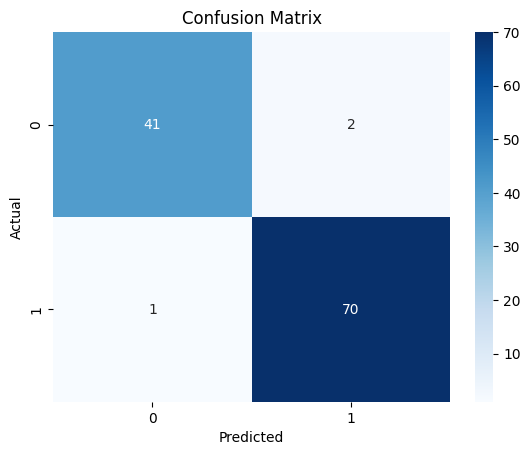

In [6]:
from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
data = load_breast_cancer()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train CatBoost
model = CatBoostClassifier(verbose=0, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## 10. You're working for a FinTech company trying to predict loan default using customer demographics and transaction behavior. The dataset is imbalanced, contains missing values, and has both numeric and categorical features. Describe your step-by-step data science pipeline using boosting techniques:
1. Data Preprocessing
- Handle missing values using:
  - Mean/Median for numerical features
  - Most frequent or CatBoost’s built-in method for categorical
- Encode categorical features:
 - Use CatBoost directly (no need for manual encoding)
 - Or use One-Hot or Ordinal Encoding if using AdaBoost/XGBoost
- Scale numerical features if using AdaBoost (not needed for tree-based models)

2. Model Choice
- Use CatBoost if the dataset has many categorical features and missing values.
- Use XGBoost if dataset is mostly numerical and performance tuning is needed.
- Use AdaBoost if dataset is clean and interpretable models are needed.

3. Hyperparameter Tuning
- Use GridSearchCV or RandomizedSearchCV for tuning:
  - Learning rate
  - Number of estimators
  - Max depth
  - Regularization parameters

4. Evaluation Metrics
- Use AUC-ROC since the dataset is imbalanced
- Also monitor Precision, Recall, and F1-score to avoid high false positives or negatives
- Confusion matrix for visual evaluation

5. Business Impact
- Early prediction of loan default helps in reducing financial risk
- Model helps in better credit decisioning
- Can be used to offer alternate credit products or request more documentation
- Boosting model provides high accuracy and interpretability with SHAP values